In [98]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [119]:
names=["name","MDVP:Fo(Hz)","MDVP:Fhi(Hz)","MDVP:Flo(Hz)","MDVP:Jitter(%)","MDVP:Jitter(Abs)","MDVP:RAP","MDVP:PPQ","Jitter:DDP","MDVP:Shimmer","MDVP:Shimmer(dB)","Shimmer:APQ3","Shimmer:APQ5","MDVP:APQ","Shimmer:DDA","NHR","HNR","status","RPDE","DFA","spread1","spread2","D2","PPE"]
df=pd.read_csv("sss.csv",names=names)
df.drop(['name'],axis=1,inplace=True)
X = np.array(df.drop(['status'], 1).astype(float))
y = np.array(df['status'])
df.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [100]:
from sklearn.cluster import KMeans
wcss =[]
a=[]
for i in range (1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter =300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    correct = 0
    for i in range(len(X)):
            predict_me = np.array(X[i].astype(float))
            predict_me = predict_me.reshape(-1, len(predict_me))
            prediction = kmeans.predict(predict_me)
            if prediction[0] == y[i]:
                correct += 1
            a.append(correct/len(X))
print(max(a))

0.5025641025641026


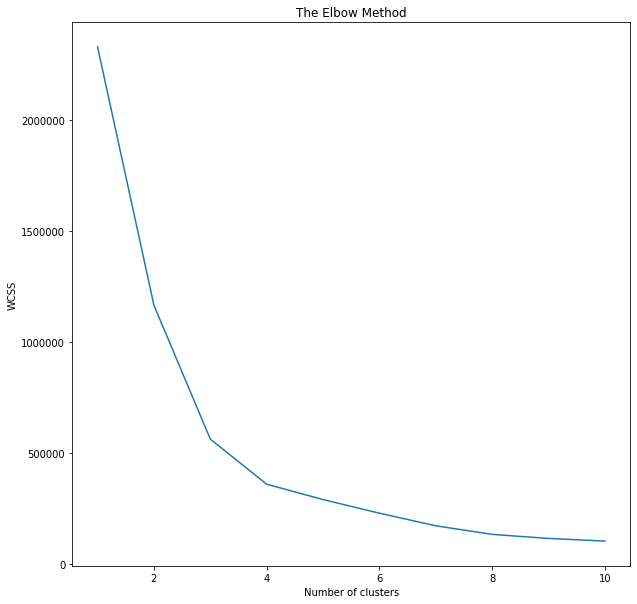

In [101]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [117]:
kmeans=KMeans(n_clusters= 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
Y_Kmeans = kmeans.fit_predict(X)

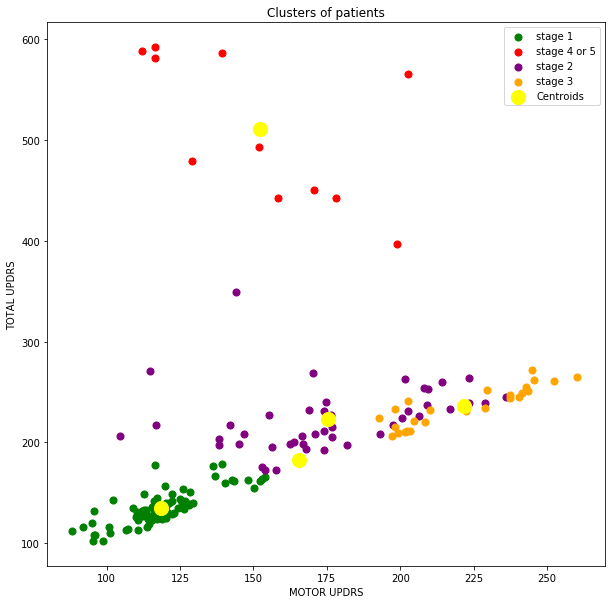

In [118]:
plt.scatter(X[Y_Kmeans == 0, 0], X[Y_Kmeans == 0,1],s = 50, c='green', label = 'stage 1')
plt.scatter(X[Y_Kmeans == 1, 0], X[Y_Kmeans == 1,1],s = 50, c='red', label = 'stage 4 or 5')
plt.scatter(X[Y_Kmeans == 2, 0], X[Y_Kmeans == 2,1],s = 50, c='purple', label = 'stage 2 ')
plt.scatter(X[Y_Kmeans == 3, 0], X[Y_Kmeans == 3,1],s = 50, c='orange', label = 'stage 3')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 200, c = 'yellow', label = 'Centroids')
plt.title('Clusters of patients')
plt.xlabel('MOTOR UPDRS')
plt.ylabel('TOTAL UPDRS')
plt.legend()
plt.show()